In [1]:
## App 03 - Basketball Data

## Process to follow
## Input - Year
## Input - Team
## Input - Position
## Output - Save dataframe csv file

## Heatmap
## Input - load df csv file again for heatmap
## Output - Plot - Heatmap

In [3]:
## EDA Basketball Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import streamlit as st
import base64
#import PIL as PIL
from PIL import Image

image_01 = Image.open(fp='./Projects/App_003_001/App_003_001_Exported/Data/Images/Facebook Cover 01.jpeg', mode='r', formats=None)
## use_column_width
st.image(image_01, use_column_width=True)

st.markdown("""""")

st.markdown("""
##### This App performs simple webscraping of NBA Player stats data.
""")


st.sidebar.header('User Input Features')
## Years From 1950 to 2023
selected_year = st.sidebar.selectbox('Year', list(reversed(range(1950, 2024))))

## Web scraping Player Stats
@st.cache_data

def load_data(year):
    url = "https://www.basketball-reference.com/leagues/NBA_" + str(year) + "_per_game.html"
    html = pd.read_html(url, header=0)
    df = html[0]
    raw = df.drop(df[df['Age'] == 'Age'].index)## Deletes repeating headers in content
    raw = raw.fillna(0)
    playerstats = raw.drop(['Rk'], axis=1)
    return playerstats
playerstats = load_data(selected_year)


## Sidebar - Team
sorted_unique_team = sorted(playerstats['Tm'].unique())
selected_team = st.sidebar.multiselect('Team', sorted_unique_team, sorted_unique_team)

## Sidebar - Position
unique_pos = ['C','PF','SF','PG','SG']
selected_pos = st.sidebar.multiselect('Position', unique_pos, unique_pos)

unique_pos_explanation = pd.DataFrame([{'C': 'Center', 'PF': 'Power Forward','SF': 'Small Forward','PG': 'Point Guard','SG': 'Shooting Guard'}])
st.sidebar.table(unique_pos_explanation)

## Filtering Data
df_selected_team = playerstats[(playerstats['Tm'].isin(selected_team)) & (playerstats['Pos'].isin(selected_pos))]

st.header('Display Playerm Stats of Selected Team(s)')
st.write('Data Dimension: ' + str(df_selected_team.shape[0]) + ' rows and ' + str(df_selected_team.shape[1]) + ' columns.')
st.dataframe(df_selected_team)

## Download NBA Player Stats Data
## https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode() ## Strings <--> Bytes Conversions
    href = f'<a href="data:file/csv;base64, {b64}" download="playerstats.csv">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_team), unsafe_allow_html=True)

### Heatmap
if st.button('Intercorrelation Heatmap'):
    st.header('Intercorrelation Matrix Heatmap')
    df_selected_team.to_csv('output.csv', index=False)
    df = pd.read_csv('output.csv')#
    #df_drop_cat_cols01 = pd.drop(colums=df['Player', 'Pos'], axis=1)#
    #df_w_dummies = pd.get_dummies(df_drop_cat_cols01, drop_first=False)#
    
    #corr = df.corr()
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
        ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
    st.pyplot()




st.write('---')
st.write('')
st.write('')
st.write('')
st.write('')
st.write('')
st.write('')
st.write('')
st.write('')


st.write('### Resources:')
st.write("""
         Data Source: [basketball-reference.com](https://www.basketball-reference.com/)\n
        [Streamlit](https://streamlit.io/)\n
         """)

st.write('###### *Code based on [Free Code Camp](https://www.freecodecamp.org/). Special Thanks to Free Code Camp and instructor Chanin Nantasenamat*')

st.write('##### Thank you to all of you who make information and knowledge available for free.')

2023-10-11 12:03:06.641 No runtime found, using MemoryCacheStorageManager
2023-10-11 12:03:07.144 Serialization of dataframe to Arrow table was unsuccessful due to: ("Expected bytes, got a 'int' object", 'Conversion failed for column FG% with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.


In [4]:
## App 03 EDA Basketball Data

## EDA Basketball Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import streamlit as st
import base64
## Extra Image and not using title since image already has the title
#import PIL as PIL
from PIL import Image


##Showing image and Header
#image_01 = Image.open(fp='./Projects/App_003_001/App_003_001_Exported/Data/Images/Facebook Cover 01.jpeg', mode='r', formats=None)
#image_01
## use_column_width
#st.image(image_01, use_column_width=True)

#st.markdown("""""")

#st.markdown("""
###### This App performs simple webscraping of NBA Player stats data.
#""")


#st.sidebar.header('User Input Features')
## Years From 1950 to 2023
#selected_year = st.sidebar.selectbox('Year', list(reversed(range(1950, 2024))))
selected_year = 2023## Debugging

## Web scraping NBA Player Stats
#@st.cache_data

def load_data(year):
    url = "https://www.basketball-reference.com/leagues/NBA_" + str(year) + "_per_game.html"
    html = pd.read_html(url, header=0)
    df = html[0]
    raw = df.drop(df[df['Age'] == 'Age'].index)## Deletes repeating headers in content
    raw = raw.fillna(0)
    playerstats = raw.drop(['Rk'], axis=1)
    return playerstats
playerstats = load_data(selected_year)


## Sidebar - Team
sorted_unique_team = sorted(playerstats['Tm'].unique())
#selected_team = st.sidebar.multiselect('Team', sorted_unique_team, sorted_unique_team)
selected_team = ['ATL', 'BOS']## Debugging

## Sidebar - Position
unique_pos = ['C','PF','SF','PG','SG']
#selected_pos = st.sidebar.multiselect('Position', unique_pos, unique_pos)
selected_pos = ['C','PF']## Debugging

unique_pos_explanation = pd.DataFrame([{'C': 'Center', 'PF': 'Power Forward','SF': 'Small Forward','PG': 'Point Guard','SG': 'Shooting Guard'}])
#st.sidebar.table(unique_pos_explanation)

## Filtering Data
df_selected_team = playerstats[(playerstats['Tm'].isin(selected_team)) & (playerstats['Pos'].isin(selected_pos))]

#st.header('Display Playerm Stats of Selected Team(s)')
#st.write('Data Dimension: ' + str(df_selected_team.shape[0]) + ' rows and ' + str(df_selected_team.shape[1]) + ' columns.')
#st.dataframe(df_selected_team)
df_selected_team = pd.DataFrame(df_selected_team)## Debugging

## Download NBA Player Stats Data
## https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode() ## Strings <--> Bytes Conversions
    href = f'<a href="data:file/csv;base64, {b64}" download="playerstats.csv">Download CSV File</a>'
    return href

#st.markdown(filedownload(df_selected_team), unsafe_allow_html=True)

### Heatmap
#if st.button('Intercorrelation Heatmap'):
#    st.header('Intercorrelation Matrix Heatmap')
#    df_selected_team.to_csv('output.csv', index=False)
#    df = pd.read_csv('output.csv')#
    #df_drop_cat_cols01 = pd.drop(colums=df['Player', 'Pos'], axis=1)#
    #df_w_dummies = pd.get_dummies(df_drop_cat_cols01, drop_first=False)#
    
    #corr = df.corr()
    #corr = df.corr()
    #mask = np.zeros_like(corr)
    #mask[np.triu_indices_from(mask)] = True
    #with sns.axes_style("white"):
        #fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
        #ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
    #st.pyplot()

## Debugging
df = pd.DataFrame(df_selected_team)## Debugging
corr = df.corr()## Debugging
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#with sns.axes_style("white"):
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
plt.show()
#st.pyplot()
## Debugging

#st.write('---')
#st.write('')
#st.write('')
#st.write('')
#st.write('')
#st.write('')
#st.write('')
#st.write('')
#st.write('')

#
#st.write('### Resources:')
#st.write("""
#         Data Source: [basketball-reference.com](https://www.basketball-reference.com/)\n
#        [Streamlit](https://streamlit.io/)\n
#         """)

#st.write('###### *Code based on [Free Code Camp](https://www.freecodecamp.org/). Special Thanks to Free Code Camp and instructor Chanin Nantasenamat*')

#st.write('##### Thank you to all of you who make information and knowledge available for free.')

ValueError: could not convert string to float: 'Clint Capela'

### Working Code Below In Python
*Need to modify it for Streamlit*

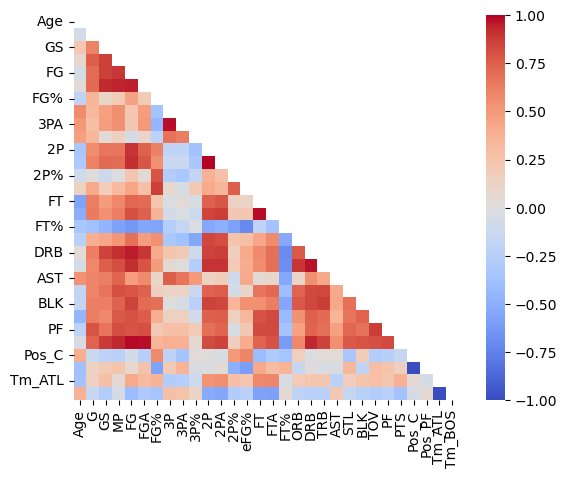

In [37]:
## App 03 EDA Basketball Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import base64
from PIL import Image

#image_01 = Image.open(fp='./Projects/App_003_001/App_003_001_Exported/Data/Images/Facebook Cover 01.jpeg', mode='r', formats=None)
#image_01
## use_column_width
#st.image(image_01, use_column_width=True)

#st.title('NBA Player Stats Explorer')

#st.markdown("""""")

#st.markdown("""
###### This App performs simple webscraping of NBA Player stats data.
#""")


#st.sidebar.header('User Input Features')
## Years From 1950 to 2023
#selected_year = st.sidebar.selectbox('Year', list(reversed(range(1950, 2024))))
selected_year = 2023## Debugging

## Web scraping NBA Player Stats
#@st.cache_data

def load_data(year):
    url = "https://www.basketball-reference.com/leagues/NBA_" + str(year) + "_per_game.html"
    html = pd.read_html(url, header=0)
    df = html[0]
    raw = df.drop(df[df['Age'] == 'Age'].index)## Deletes repeating headers in content
    raw = raw.fillna(0)
    playerstats = raw.drop(['Rk'], axis=1)
    return playerstats
playerstats = load_data(selected_year)


## Sidebar - Team
sorted_unique_team = sorted(playerstats['Tm'].unique())
#selected_team = st.sidebar.multiselect('Team', sorted_unique_team, sorted_unique_team)
selected_team = ['ATL', 'BOS']## Debugging

## Sidebar - Position
unique_pos = ['C','PF','SF','PG','SG']
#selected_pos = st.sidebar.multiselect('Position', unique_pos, unique_pos)
selected_pos = ['C','PF']## Debugging

unique_pos_explanation = pd.DataFrame([{'C': 'Center', 'PF': 'Power Forward','SF': 'Small Forward','PG': 'Point Guard','SG': 'Shooting Guard'}])
#st.sidebar.table(unique_pos_explanation)

## Filtering Data
df_selected_team = playerstats[(playerstats['Tm'].isin(selected_team)) & (playerstats['Pos'].isin(selected_pos))]

#st.header('Display Playerm Stats of Selected Team(s)')
#st.write('Data Dimension: ' + str(df_selected_team.shape[0]) + ' rows and ' + str(df_selected_team.shape[1]) + ' columns.')
#st.dataframe(df_selected_team)
df_selected_team_htmp = pd.DataFrame(df_selected_team)## Debugging

pd.set_option('display.max_columns', 500)
df_selected_team_htmp

df_selected_team_dummies = df_selected_team_htmp[['Pos', 'Tm']]
df_selected_team_dummies = pd.get_dummies(data=df_selected_team_dummies, drop_first=False).astype('int')
df_selected_team_dummies
df_selected_team_htmp = df_selected_team_htmp.drop(columns=['Player', 'Pos', 'Tm'], axis=1)
df_selected_team_htmp = pd.concat(objs=[df_selected_team_htmp, df_selected_team_dummies], axis=1)
df_selected_team_htmp
corr = df_selected_team_htmp.corr()
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, center=0, cmap='coolwarm')
plt.show()
#print(len(df_selected_team_dummies['Pos'].unique()))## unique values will depend on what user decides to choose on filter.
## Note: Maximum number of positions is 5 unique_pos = ['C','PF','SF','PG','SG']
#print(len(df_selected_team_dummies['Tm'].unique()))## unique values will depend on what user decides to choose on filter.['Tm']
## Note: Maximum number of teams is the number of NBA Teams that exist on the database

